# Earth Observation Temporal Stack
The class eoTempStack reads the resulting products of the pre-processed Sentinel-1, Sentinel-2 and Landsat (7/8) images. The pre-processing script results in a defined directory structure with is hard coded in the class methods. The class has the necessary methods to calculate two vegetation indices from the available optical images.



In [1]:
from eo_stack import *

In [3]:
s1 = S1TempStack('/home/azalazar/data/Ibague/pre/', '/home/azalazar/data/Ibague/pre/stack/')
s2 = S2TempStack('/home/azalazar/data/Ibague/pre/', '/home/azalazar/data/Ibague/pre/stack/')
l8 = L8TempStack('/home/azalazar/data/Ibague/Landsat/', '/home/azalazar/data/Ibague/pre/stack/')
l7 = L7TempStack('/home/azalazar/data/Ibague/Landsat/', '/home/azalazar/data/Ibague/pre/stack/')

S1 object initialized from /home/azalazar/data/Ibague/pre/
S2 object initialized from /home/azalazar/data/Ibague/pre/


## xarray structures
Two options, creating an xarray Dataset or Array.

In [4]:
s1_xar = s1.getXarray()
s2_xar = s2.getXarray()
l7_xar = l7.getXarray()
l8_xar = l8.getXarray()

In [4]:
s1_xds = s1.getXDataset()
s2_xds = s2.getXDataset()
l7_xds = l7.getXDataset()
l8_xds = l8.getXDataset()

In [6]:
#xdataset.coords['time']
def plot_index(xdataset, band, date, mask=True):
    """"""
    #time = datetime.datetime.strptime(date, '%Y-%m-%d')
    xdataset[band].where(xdataset.mask).sel(time=date).plot(cmap='RdYlGn')#cmap='gist_gray'
    
plot_index(s2_xds, 'NDVI', '2018-01-04')

## Quality pixels
Calculate percentage of quality pixels

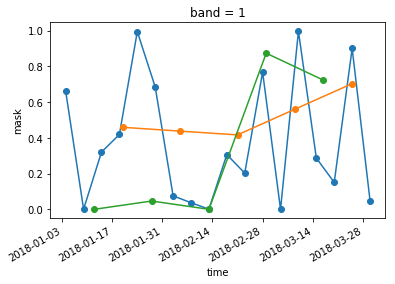

In [7]:
# Calculate percentage of quality pixels
s2_xds.mask.mean(['x', 'y']).sortby('time').plot.line(x='time', marker='o')
l7_xds.mask.mean(['x', 'y']).sortby('time').plot.line(x='time', marker='o')
l8_xds.mask.mean(['x', 'y']).sortby('time').plot.line(x='time', marker='o')

## Plotting
Plotting time series of a defined coordinate

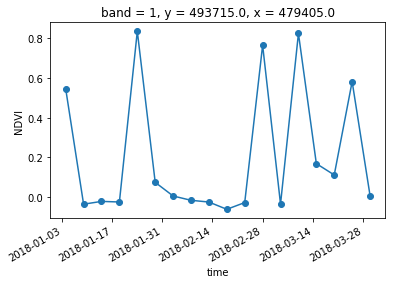

In [9]:
s2_xds['NDVI'].sel(x=479405, y=493715).sortby('time').plot(x='time', marker='o')

Masking the time series using the quality mask

In [16]:
#%matplotlib inline
time_series = s2_xds['NDVI'].where(s2_xds.mask).sortby('time').sel(y=486925, x=487305).sortby('time')
time_series

<xarray.DataArray (time: 18)>
array([0.424561,      nan,      nan, 0.739694, 0.775534, 0.789194,      nan,
            nan,      nan,      nan,      nan, 0.542857,      nan, 0.815238,
            nan,      nan, 0.742382, 0.363948], dtype=float32)
Coordinates:
    band     int64 1
    y        float64 4.869e+05
    x        float64 4.873e+05
  * time     (time) datetime64[ns] 2018-01-04 2018-01-09 2018-01-14 ...
    mask     (time) bool True False False True True True False False False ...
Attributes:
    crs:                       +init=epsg:32618
    header_offset:             0
    data_type:                 4
    nodatavals:                (nan,)
    file_type:                 ENVI Standard
    res:                       (10.0, 10.0)
    lines:                     1418
    transform:                 (479300.0, 10.0, -0.0, 493930.0, -0.0, -10.0)
    byte_order:                0
    coordinate_system_string:  PROJCS["WGS_1984_UTM_Zone_18N",GEOGCS["GCS_WGS...
    interleave:           

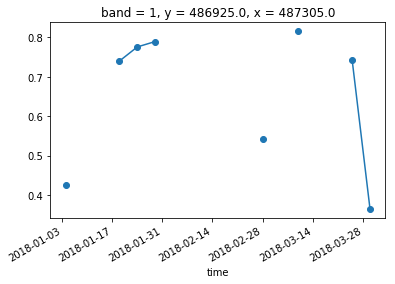

In [18]:
time_series.plot(marker='o')

## Radar data
Plot values per polarization

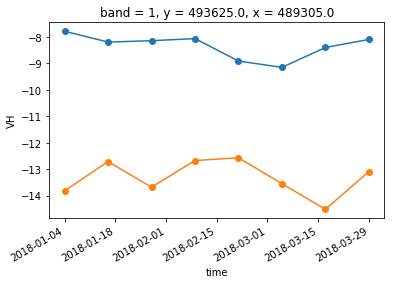

In [19]:
s1_xds['VV'].isel(x=1000, y=30).sortby('time').plot.line(x='time', marker='o')
s1_xds['VH'].isel(x=1000, y=30).sortby('time').plot.line(x='time', marker='o')

## xarray custom methods

Use xarray register accessors to perform user defined methods. e.g. to report rgb images of eo_stack

In [4]:
from eotemparray import *

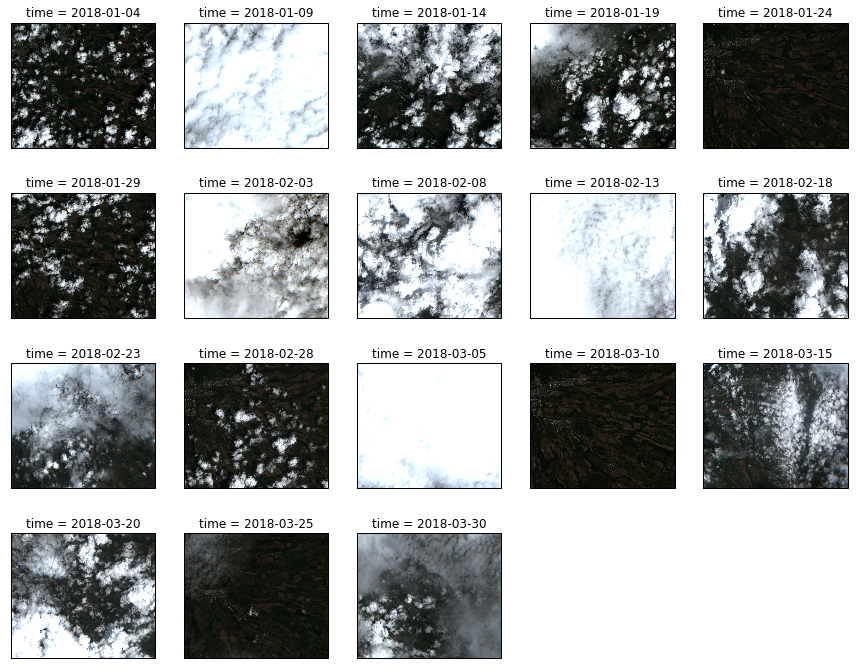

In [34]:
s2_xar.eotemp.plot_RGB()  # calls the EOTempArray.plot_RGB method

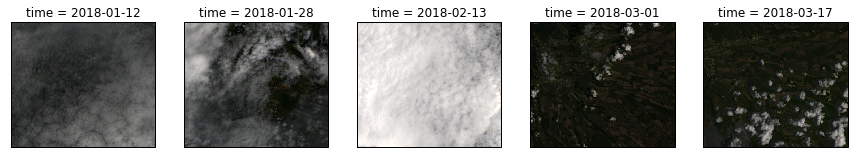

In [36]:
l8_xar.eotemp.plot_RGB()

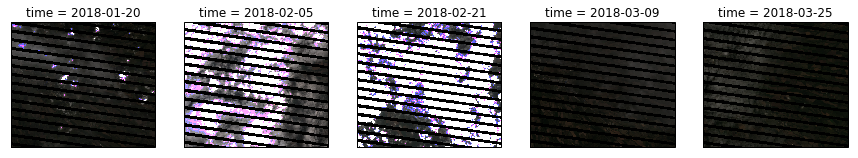

In [38]:
l7_xar.eotemp.plot_RGB()

## Data storage
Storing xarray data objects in netcdf files

In [ ]:
# Serialization of xarray and xdatabase objects
s1_xar.to_netcdf('/home/azalazar/data/Ibague/pre/stack/s1xar.nc')
s2_xar.to_netcdf('/home/azalazar/data/Ibague/pre/stack/s2xar.nc')
l7_xar.to_netcdf('/home/azalazar/data/Ibague/pre/stack/l7xar.nc')
l8_xar.to_netcdf('/home/azalazar/data/Ibague/pre/stack/l8xar.nc')
s1_xds.to_netcdf('/home/azalazar/data/Ibague/pre/stack/s1xds.nc')
s2_xds.to_netcdf('/home/azalazar/data/Ibague/pre/stack/s2xds.nc')
l7_xds.to_netcdf('/home/azalazar/data/Ibague/pre/stack/l7xds.nc')
l8_xds.to_netcdf('/home/azalazar/data/Ibague/pre/stack/l8xds.nc')